##Mini Project 2 : **Investigate Hotel Business using Data Visualization** 🏢

- Business Understanding
- Data Preparation
- Data Understanding

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from datetime import datetime

from scipy.stats import skew
from scipy.stats import kurtosis

#Ignores warning
import warnings
warnings.filterwarnings('ignore')

sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style('whitegrid')

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if round(x,0) == x else '(:.3f)'.format(x)

import matplotlib as mp
%matplotlib inline
import textwrap
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
#Import Dataset
#source = '/Users/kiii_rey/Documents/Kirey/Data science learning/Mini project 2/hotel_bookings_data.csv'

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Mini Project/hotel_bookings_data.csv'

# Baca data CSV menggunakan pandas
df = pd.read_csv(file_path)

#df = pd.read_csv(source)
df.head()

Mounted at /content/drive


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


**Check Data Information**

In [ ]:
#Basic Dataset Information

print('Shape of Data :', df.shape)
print('Number of Rows :', df.shape[0])
print('Number of Columns :', df.shape[1])

Shape of Data : (119390, 29)
Number of Rows : 119390
Number of Columns : 29


In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'meal',
       'city', 'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'deposit_type', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

In [ ]:
#Info of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

<b>Observations:</b><br>The dataset consists of `29 columns` and `119,390 rows` of data.<br>There are 3 types of data: `float64(4), int64(16), object(9)`.<br>There are some missing values in the following columns:
- `company` amounting to `112,593 rows`.
- `agent` amounting to `16,340 rows`.
- `city` amounting to `488 rows`.
- `children` amounting to `4 rows`.

##<b> Data Preprocessing <b> 🛠

1. Handling Duplicate Rows
2. Handling null data
3. Replace unnecessary values
4. Drop unnecessary data

###**1. Handling Duplicate Rows**

In [ ]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns.values)).head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
78101,City Hotel,0,0,2017,December,40,2,0,2,1,...,2,No Deposit,NaN,NaN,0,Family,145.0,0,0,Check-Out
78104,City Hotel,0,0,2017,December,40,2,0,2,1,...,2,No Deposit,NaN,NaN,0,Family,145.0,0,0,Check-Out
78105,City Hotel,0,0,2017,December,40,2,0,2,1,...,2,No Deposit,NaN,NaN,0,Family,145.0,0,0,Check-Out
78403,City Hotel,0,0,2017,December,41,6,0,3,1,...,0,No Deposit,NaN,NaN,0,Personal,130.0,0,0,Check-Out
78407,City Hotel,0,0,2017,December,41,6,0,3,1,...,0,No Deposit,NaN,NaN,0,Personal,130.0,0,0,Check-Out
78385,City Hotel,0,0,2017,December,41,7,0,2,1,...,0,No Deposit,1.0,NaN,0,Family,119.0,0,0,Check-Out
78401,City Hotel,0,0,2017,December,41,7,0,2,1,...,0,No Deposit,1.0,NaN,0,Family,119.0,0,0,Check-Out
78404,City Hotel,0,0,2017,December,41,7,0,2,1,...,0,No Deposit,1.0,NaN,0,Family,119.0,0,0,Check-Out
78402,City Hotel,0,0,2017,December,41,7,0,2,2,...,0,No Deposit,1.0,NaN,0,Family,138.0,0,0,Check-Out
78405,City Hotel,0,0,2017,December,41,7,0,2,2,...,0,No Deposit,1.0,NaN,0,Family,138.0,0,0,Check-Out


In [ ]:
print('Number of duplicates rows :', df.duplicated().sum())

Number of duplicates rows : 33261


In [ ]:
print(f'Data Frame Dimension Before Duplicate Removal: {df.shape}')
df = df.drop_duplicates().reset_index(drop=True)
print(f'Data Frame Dimension After Duplicate Removal: {df.shape}')

Data Frame Dimension Before Duplicate Removal: (119390, 29)
Data Frame Dimension After Duplicate Removal: (86129, 29)


<b>Observations:<b>
- This dataset has many duplicates, totaling 33,261 rows.
- Before handling duplicate rows, the dataset had 119,390 rows.
- After handling duplicate rows, the dataset is left with 86,129 rows.

###**2. Handling Missing Values**

In [ ]:
#The Number of NULL entries in each column
df.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_weekdays_nights              0
adults                                0
children                              4
babies                                0
meal                                  0
city                                450
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
booking_changes                       0
deposit_type                          0
agent                             11941
company                           81019
days_in_waiting_list                  0
customer_type                         0


In [ ]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc['Data Type'] = [df[col].dtype for col in df.columns]
nvc.sort_values(by=['Total Null Values', 'Percentage'], ascending=False, inplace=True)

print(nvc)

Missing values status: True
                                Total Null Values  Percentage Data Type
company                                     81019   94.067039    object
agent                                       11941   13.864088     int64
city                                          450    0.522472     int64
children                                        4    0.004644   float64
hotel                                           0    0.000000    object
required_car_parking_spaces                     0    0.000000     int64
adr                                             0    0.000000     int64
customer_type                                   0    0.000000     int64
days_in_waiting_list                            0    0.000000    object
deposit_type                                    0    0.000000     int64
booking_changes                                 0    0.000000     int64
previous_bookings_not_canceled                  0    0.000000     int64
previous_cancellations              

<b>Observations:</b><br>
- `company` with a total `94%` null values
- `agent` with a total of `13.8%` null values
- `city` with a total of `0.5%` null values
- `children` with a total of `0.004%` null values

In [ ]:
missing_values = ['n/a', 'na', 'nan', '-', '--', 'null', 'Null', '', ' ', '-1', -1]
for i in df.columns:
    dmmy_col = df[i].apply(lambda x : str(x).strip())
    isnan = dmmy_col.isin(missing_values).any()
    miss = np.unique(dmmy_col[dmmy_col.isin(missing_values)].values)
    if isnan :
        print('{} = {} - {}'.format(i, isnan, miss))

children = True - ['nan']
city = True - ['nan']
agent = True - ['nan']
company = True - ['nan']


<Figure size 1000x600 with 0 Axes>

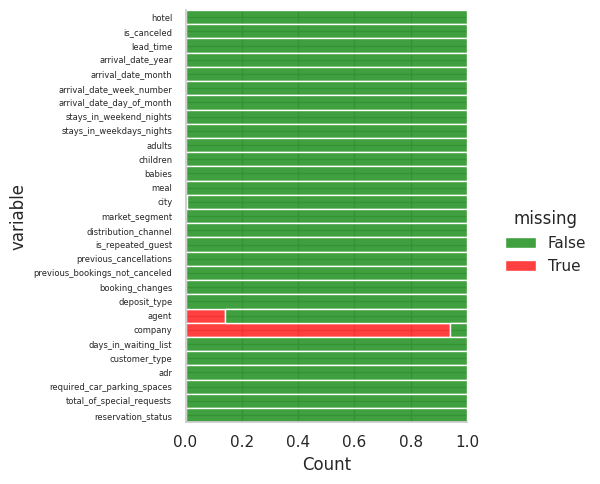

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,6))

dms = sns.displot(
    data=df.isna().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    aspect=1.25,
    palette = ['green','red']
)

dms.set_yticklabels(size = 6)

In [ ]:
#filling zero value in the company because no company is involved
df['company'] = df['company'].fillna(0)
#filling zero value in the agent because no agent is involved
df['agent'] = df['agent'].fillna(0)
#filling zero rating on children is probably because the customer has no children
df['children'] = df['children'].fillna(0)
#filling 'unknown' for unavailable city
df['city'] = df['city'].fillna('unknown')

<b>Observations:</b><br>
- `company` , Filling zero values in the company column since no company is involved.
- `agent` , Filling zero values in the agent column since no agent is involved.
- `city` , Filling 'unknown' for unavailable city entries.
- `children` , Filling zero values for children, as it is likely that the customers have no children.

In [ ]:
#Number of NULL entries after cleaning
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

###**3. Handling Incorrect Values**

Data Type Information

In [ ]:
print('Data type before correction:\n')
df.info()

Data type before correction:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86129 entries, 0 to 86128
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86129 non-null  object 
 1   is_canceled                     86129 non-null  int64  
 2   lead_time                       86129 non-null  int64  
 3   arrival_date_year               86129 non-null  int64  
 4   arrival_date_month              86129 non-null  object 
 5   arrival_date_week_number        86129 non-null  int64  
 6   arrival_date_day_of_month       86129 non-null  int64  
 7   stays_in_weekend_nights         86129 non-null  int64  
 8   stays_in_weekdays_nights        86129 non-null  int64  
 9   adults                          86129 non-null  int64  
 10  children                        86129 non-null  float64
 11  babies                          86129 non-null  int64  
 12  me

**Change some column data types**<br>
- Change the data type of `float64` which had null before, `children`, `agent`, and `company` to `int64`


In [ ]:
df['children'] = df['children'].astype('int64')
df['agent'] = df['agent'].astype('int64')
df['company'] = df['company'].astype('int64')

In [ ]:
print('Data type after correction:\n')
df.info()

Data type after correction:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86129 entries, 0 to 86128
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86129 non-null  object 
 1   is_canceled                     86129 non-null  int64  
 2   lead_time                       86129 non-null  int64  
 3   arrival_date_year               86129 non-null  int64  
 4   arrival_date_month              86129 non-null  object 
 5   arrival_date_week_number        86129 non-null  int64  
 6   arrival_date_day_of_month       86129 non-null  int64  
 7   stays_in_weekend_nights         86129 non-null  int64  
 8   stays_in_weekdays_nights        86129 non-null  int64  
 9   adults                          86129 non-null  int64  
 10  children                        86129 non-null  int64  
 11  babies                          86129 non-null  int64  
 12  mea

Number of NULL entries after cleaning

In [ ]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

**Handling Invalid Values**


- Check for the unique values in the data

In [ ]:
for x in df.columns :
    unq = list(df[x].unique())
    unq.sort()

    print (f'===== {x} =====')
    if len(unq) >= 13:
        prt = list(unq[:12])+['.....']
        print (f'{prt}')
    else:
        print (f'{unq}')
    print()

===== hotel =====
['City Hotel', 'Resort Hotel']

===== is_canceled =====
[0, 1]

===== lead_time =====
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, '.....']

===== arrival_date_year =====
[2017, 2018, 2019]

===== arrival_date_month =====
['April', 'August', 'December', 'February', 'January', 'July', 'June', 'March', 'May', 'November', 'October', 'September']

===== arrival_date_week_number =====
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, '.....']

===== arrival_date_day_of_month =====
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, '.....']

===== stays_in_weekend_nights =====
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, '.....']

===== stays_in_weekdays_nights =====
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, '.....']

===== adults =====
[0, 1, 2, 3, 4, 5, 6, 10, 20, 26, 27, 40, '.....']

===== children =====
[0, 1, 2, 3, 10]

===== babies =====
[0, 1, 2, 9, 10]

===== meal =====
['Breakfast', 'Dinner', 'Full Board', 'No Meal', 'Undefined']

===== city =====
['Kabupaten Aceh Jaya', 'Kabupaten Bandung', 'Kabupa

- Replacing incorrect values in `meal` column
  - Changing `Undefined` to `No Meal`

In [ ]:
df['meal'] = df['meal'].replace(['Undefined'],'No Meal')

In [ ]:
df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal'], dtype=object)

###**4. Drop Unnecessary Data**
It can be seen that the data in the hotel is strongly influenced by the customer's condition. So we need to ensure the total number of guests/customers on each order.
-  Number of Customers/Guests
-  Total duration of the night

In [ ]:
print('======= Before Drop Unnecessary Date =======')
print('Total Data = {} rows'.format(df.shape[0]))

#Number of Customers / Guests (adults/children/babies)
df['total_guests'] = df['adults'] + df['children'] + df['babies']
print('No Customers / Guests = {} rows'.format(df[df['total_guests'] == 0].shape[0]))

#Number of duration of the nights (weekend/weekdays)
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
print('No Duration of Stay = {} rows'.format(df[df['stay_duration'] == 0].shape[0]))

print('======= After Drop Unnecessary Date =======')
#pick the necessary date
df_final = df[(df['total_guests'] > 0) & (df['stay_duration'] > 0)]

print('Total Data = {} rows'.format(df_final.shape[0]))

======= Before Drop Unnecessary Date =======
Total Data = 86129 rows
No Customers / Guests = 165 rows
No Duration of Stay = 645 rows
======= After Drop Unnecessary Date =======
Total Data = 85378 rows


Division by Type of Data

In [ ]:
df_final.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,0,0,Personal,75.0,0,0,Check-Out,1,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,304,0,0,Personal,75.0,0,0,Check-Out,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,240,0,0,Personal,98.0,0,1,Check-Out,2,2
5,Resort Hotel,0,0,2017,September,27,1,0,2,2,...,0,0,0,Personal,107.0,0,0,Check-Out,2,2
6,Resort Hotel,0,9,2017,September,27,1,0,2,2,...,303,0,0,Personal,103.0,0,1,Check-Out,2,2


List of Column Types:

Categorical Features:

- `hotel` (Nominal): Tipe hotel, terdiri dari 'City Hotel' dan 'Resort Hotel'.
- `arrival_date_year` (Ordinal): 2017,2018,2019.
- `arrival_date_month` (Nominal): Bulan kedatangan tamu, terdiri dari 'January', 'February', ..., 'December'.
- `meal` (Nominal): Jenis makanan yang dipesan oleh tamu, terdiri dari 'Breakfast', 'Dinner', 'Full Board', 'No Meal'.
- `city` (Nominal): Nama kota tempat hotel berada, memiliki berbagai nama kota.
- `market_segment` (Nominal): Segmentasi pasar pelanggan, terdiri dari 'Aviation', 'Complementary', 'Corporate', 'Direct', 'Groups', 'Offline TA/TO', 'Online TA', 'Undefined'.
- `distribution_channel` (Nominal): Saluran distribusi pemesanan, terdiri dari 'Corporate', 'Direct', 'GDS', 'TA/TO', 'Undefined'.
- `deposit_type` (Nominal): Jenis deposit yang digunakan oleh tamu, terdiri dari 'No Deposit', 'Non Refund', 'Refundable'.
- `agent` (Nominal): ID agen pemesanan.
- `company` (Nominal): ID perusahaan pemesanan.
- `customer_type` (Nominal): Tipe pelanggan, terdiri dari 'Bussiness', 'Contract', 'Family', 'Personal'.
- `reservation_status` (Nominal): Status pemesanan, terdiri dari 'Canceled', 'Check-Out', 'No-Show'.
- `is_canceled` (Nominal): Menunjukkan apakah pemesanan dibatalkan (1) atau tidak (0).
- `is_repeated_guest` (Nominal): Menunjukkan apakah tamu adalah tamu berulang (1) atau tidak (0).

Numerical Features:

- `lead_time` (Rasio): Jumlah hari antara tanggal pemesanan dan tanggal kedatangan.
- `arrival_date_week_number` (Ordinal): Nomor minggu dalam tahun ketika tamu tiba.
- `arrival_date_day_of_month` (Ordinal): Tanggal kedatangan.
- `stays_in_weekend_nights` (Rasio): Jumlah malam yang dihabiskan di akhir pekan (Jumat dan Sabtu).
- `stays_in_weekdays_nights` (Rasio): Jumlah malam yang dihabiskan pada hari kerja (Senin hingga Jumat).
- `adults` (Rasio): Jumlah tamu dewasa.
- `children` (Rasio): Jumlah tamu anak-anak.
- `babies` (Rasio): Jumlah bayi yang ikut serta.
- `previous_cancellations` (Rasio): Jumlah pemesanan yang pernah dibatalkan oleh tamu sebelumnya.
- `previous_bookings_not_canceled` (Rasio): Jumlah pemesanan sebelumnya yang tidak dibatalkan oleh tamu.
- `booking_changes` (Rasio): Jumlah perubahan pemesanan yang dibuat oleh tamu.
- `days_in_waiting_list` (Rasio): Jumlah hari dalam daftar tunggu sebelum pemesanan dikonfirmasi.
- `adr` (Interval): Tarif rata-rata per malam.
- `required_car_parking_spaces` (Ordinal): Jumlah slot parkir mobil yang dipesan oleh tamu.
- `total_of_special_requests` (Ordinal): Jumlah permintaan khusus yang diminta oleh tamu.
- `total guests` (Rasio): Jumlah total tamu.
- `stay_duration` (Rasio): Durasi tinggal.

In [ ]:
# Fitur Kategorik (cat_cols)
cat_cols = ['hotel', 'arrival_date_year', 'arrival_date_month', 'meal', 'city',
            'market_segment', 'distribution_channel', 'deposit_type', 'agent',
            'company', 'customer_type', 'reservation_status', 'is_canceled',
            'is_repeated_guest']

# Fitur Numerik (num_cols)
num_cols = ['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
            'stays_in_weekend_nights', 'stays_in_weekdays_nights', 'adults',
            'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled',
            'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
            'total_of_special_requests', 'total_guests', 'stay_duration']

<b>Statistical Summary<b><br>
Numerical + Date Features

In [ ]:
print('The number of numerical features is {}'.format(len(num_cols)))

n = int(len(num_cols)/2)
df[num_cols[:n]].describe(datetime_is_numeric=True).fillna('-').loc[['count','mean','std','min','25%','50%','75%','max'],]

The number of numerical features is 17


,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies
count,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000
mean,79.246224,26.796433,15.806511,1.009753,2.633225,1.878554,0.140278,0.010984
std,85.498774,13.675130,8.840436,1.033402,2.058316,0.627558,0.458337,0.114421
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,49.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000
75%,124.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000
max,737.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000


In [ ]:
df[num_cols[n:]].describe(datetime_is_numeric=True).fillna('-').loc[['count','mean','std','min','25%','50%','75%','max'],]

,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guests,stay_duration
count,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000
mean,0.030570,0.186569,0.271987,0.645114,106.634109,0.085233,0.705059,2.029816,3.642977
std,0.371465,1.744405,0.729529,9.282699,55.175319,0.283070,0.833525,0.796360,2.770239
min,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,72.250000,0.000000,0.000000,2.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,98.750000,0.000000,1.000000,2.000000,3.000000
75%,0.000000,0.000000,0.000000,0.000000,134.510000,0.000000,1.000000,2.000000,5.000000
max,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,55.000000,69.000000


**Categorical Features**

In [ ]:
print('The number of categorical features is {}'.format(len(cat_cols)))

The number of categorical features is 14


In [ ]:
dfc = df.copy()

for i in cat_cols:
  dfc[i] = dfc[i].astype('category')

dfc[cat_cols].describe().transpose()

,count,unique,top,freq
hotel,86129,2,City Hotel,52575
arrival_date_year,86129,3,2018,41841
arrival_date_month,86129,12,October,11150
meal,86129,4,Breakfast,67088
city,86129,178,Kota Denpasar,26903
market_segment,86129,8,Online TA,51393
distribution_channel,86129,5,TA/TO,68141
deposit_type,86129,3,No Deposit,85024
agent,86129,334,9,28629
company,86129,353,0,81019


In [ ]:
for i in cat_cols:
  print(i)
  print(dfc[i].value_counts().iloc[:10])
  print()

hotel
City Hotel      52575
Resort Hotel    33554
Name: hotel, dtype: int64

arrival_date_year
2018    41841
2019    31423
2017    12865
Name: arrival_date_year, dtype: int64

arrival_date_month
October      11150
September     9986
July          8242
June          7811
August        7657
May           7435
December      6719
November      6457
April         6035
February      5082
Name: arrival_date_month, dtype: int64

meal
Breakfast     67088
No Meal        9896
Dinner         8798
Full Board      347
Name: meal, dtype: int64

city
Kota Denpasar                 26903
Kabupaten Bangka              10303
Kota Yogyakarta                8718
Kota Batu                      7166
Kabupaten Bandung              5279
Kabupaten Kepulauan Seribu     3015
Kota Malang                    2991
Kabupaten Magelang             2070
Kota Jakarta Barat             1983
Kabupaten Belitung             1898
Name: city, dtype: int64

market_segment
Online TA        51393
Offline TA/TO    13492
Direct      

**Exploring Business Insights**

Monthly Hotel Booking Analysis Based on Hotel Type

In [ ]:
df_final.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,0,0,Personal,75.0,0,0,Check-Out,1,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,304,0,0,Personal,75.0,0,0,Check-Out,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,240,0,0,Personal,98.0,0,1,Check-Out,2,2
5,Resort Hotel,0,0,2017,September,27,1,0,2,2,...,0,0,0,Personal,107.0,0,0,Check-Out,2,2
6,Resort Hotel,0,9,2017,September,27,1,0,2,2,...,303,0,0,Personal,103.0,0,1,Check-Out,2,2


##<b> Monthly Hotel Booking Analysis Based on Hotel Type <b> 📊

1. Create an aggregate table
2. Normalize the data
3. Sort data by month
4. Make a plot
5. Write an interpretation

###**1. Create an aggregate table that shows the comparison of the number of hotel bookings each month based on hotel type**

In [ ]:
# Membuat kolom baru 'arrival_date_num_month'

# Dictionary untuk melakukan pemetaan nama bulan ke nilai numerik
month_to_num = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Menggunakan fungsi map() untuk melakukan pemetaan dari nama bulan ke nilai numerik
df_final['arrival_date_num_month'] = df_final['arrival_date_month'].map(month_to_num)


In [ ]:
df_final['arrival_date_num_month'] = pd.to_datetime(df_final['arrival_date_month'], format='%B').dt.month

In [ ]:
df_final['arrival_date_num_month'].unique()

array([ 9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8])

In [ ]:
dfg = df_final.groupby(['hotel', 'arrival_date_month', 'arrival_date_num_month', 'arrival_date_year']) \
       .agg({'hotel':'count'}) \
       .rename(columns={'hotel': 'total_booking'}) \
       .reset_index()

dfg.sort_values(by=['hotel', 'arrival_date_num_month', 'arrival_date_year', ], inplace=True)
dfg.drop('arrival_date_num_month', axis=1, inplace=True)
dfg.set_index(['hotel', 'arrival_date_month', 'arrival_date_year'])

total_booking
hotel        arrival_date_month arrival_date_year               
City Hotel   January            2017                         753
                                2018                        2096
             February           2017                         988
                                2018                        1964
             March              2018                        1004
                                2019                        1670
             April              2018                        1608
                                2019                        1906
             May                2018                        2340
                                2019                        2437
             June               2018                        2376
                                2019                        2641
             July               2018                        2290
                                2019                        3031
             August             2018                        2215
                                2019                        2693
             September          2017                         370
                                2018                        2447
                                2019                        2840
             October            2017                        1051
                                2018                        2774
                                2019                        2648
             November           2017                        1531
                                2018                        2509
             December           2017                        1439
                                2018                        2570
Resort Hotel January            2017                         831
                                2018                        1164
             February           2017                         923
                                2018                        1121
             March              2018                         798
                                2019                        1106
             April              2018                        1124
                                2019                        1329
             May                2018                        1419
                                2019                        1166
             June               2018                        1313
                                2019                        1443
             July               2018                        1374
                                2019                        1489
             August             2018                        1197
                                2019                        1508
             September          2017                        1258
                                2018                        1349
                                2019                        1656
             October            2017                        1329
                                2018                        1585
                                2019                        1701
             November           2017                        1132
                                2018                        1254
             December           2017                        1090
                                2018                        1528

In [ ]:
df_book = df_final.groupby(['hotel', 'arrival_date_month', 'arrival_date_num_month']) \
                  .agg({'arrival_date_year':['nunique','count']}) \
                  .reset_index()

df_book.columns = ['hotel_type', 'arrival_month', 'arrival_num_month', 'num_year', 'total_booking']
df_book

,hotel_type,arrival_month,arrival_num_month,num_year,total_booking
0,City Hotel,April,4,2,3514
1,City Hotel,August,8,2,4908
2,City Hotel,December,12,2,4009
3,City Hotel,February,2,2,2952
4,City Hotel,January,1,2,2849
5,City Hotel,July,7,2,5321
6,City Hotel,June,6,2,5017
7,City Hotel,March,3,2,2674
8,City Hotel,May,5,2,4777
9,City Hotel,November,11,2,4040


###**2. Normalize the data**

In [ ]:
df_book[df_book['num_year'] != 2]

,hotel_type,arrival_month,arrival_num_month,num_year,total_booking
10,City Hotel,October,10,3,6473
11,City Hotel,September,9,3,5657
22,Resort Hotel,October,10,3,4615
23,Resort Hotel,September,9,3,4263


It can be observed that both the City and Resort Hotels have data for the past 3 years in the columns of October and September. In contrast, the data for other months only includes the last 2 years. Hence, it is necessary to normalize the data by calculating the average values. This step is crucial to ensure an appropriate comparison and accurate interpretation of the trend across all months.

In [ ]:
df_book['avg_booking'] = round(df_book['total_booking'] / df_book['num_year'])
df_book

,hotel_type,arrival_month,arrival_num_month,num_year,total_booking,avg_booking
0,City Hotel,April,4,2,3514,1757.0
1,City Hotel,August,8,2,4908,2454.0
2,City Hotel,December,12,2,4009,2004.0
3,City Hotel,February,2,2,2952,1476.0
4,City Hotel,January,1,2,2849,1424.0
5,City Hotel,July,7,2,5321,2660.0
6,City Hotel,June,6,2,5017,2508.0
7,City Hotel,March,3,2,2674,1337.0
8,City Hotel,May,5,2,4777,2388.0
9,City Hotel,November,11,2,4040,2020.0


###**3. Sort the data based on the months**

In [ ]:
df_book.sort_values(by=['hotel_type', 'arrival_num_month'], inplace=True)

sorter = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_book['arrival_month'] = pd.Categorical(df_book['arrival_month'],
                                          categories=sorter,
                                          ordered=True)

ordered_sort = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                  "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_book["month"] = df_book["arrival_month"].str[:3]
df_book["month"] = pd.Categorical(df_book["month"],
                                  categories=ordered_sort,
                                  ordered=True)

df_book

,hotel_type,arrival_month,arrival_num_month,num_year,total_booking,avg_booking,month
4,City Hotel,January,1,2,2849,1424.0,Jan
3,City Hotel,February,2,2,2952,1476.0,Feb
7,City Hotel,March,3,2,2674,1337.0,Mar
0,City Hotel,April,4,2,3514,1757.0,Apr
8,City Hotel,May,5,2,4777,2388.0,May
6,City Hotel,June,6,2,5017,2508.0,Jun
5,City Hotel,July,7,2,5321,2660.0,Jul
1,City Hotel,August,8,2,4908,2454.0,Aug
11,City Hotel,September,9,3,5657,1886.0,Sep
10,City Hotel,October,10,3,6473,2158.0,Oct


###**4. Create a plot to show changes in the increase or decrease in the number of hotel bookings each month based on the hotel types**
---
*   x = Month
*   y = Average Total Booking

Create two line plots-bar plots for each type of hotel

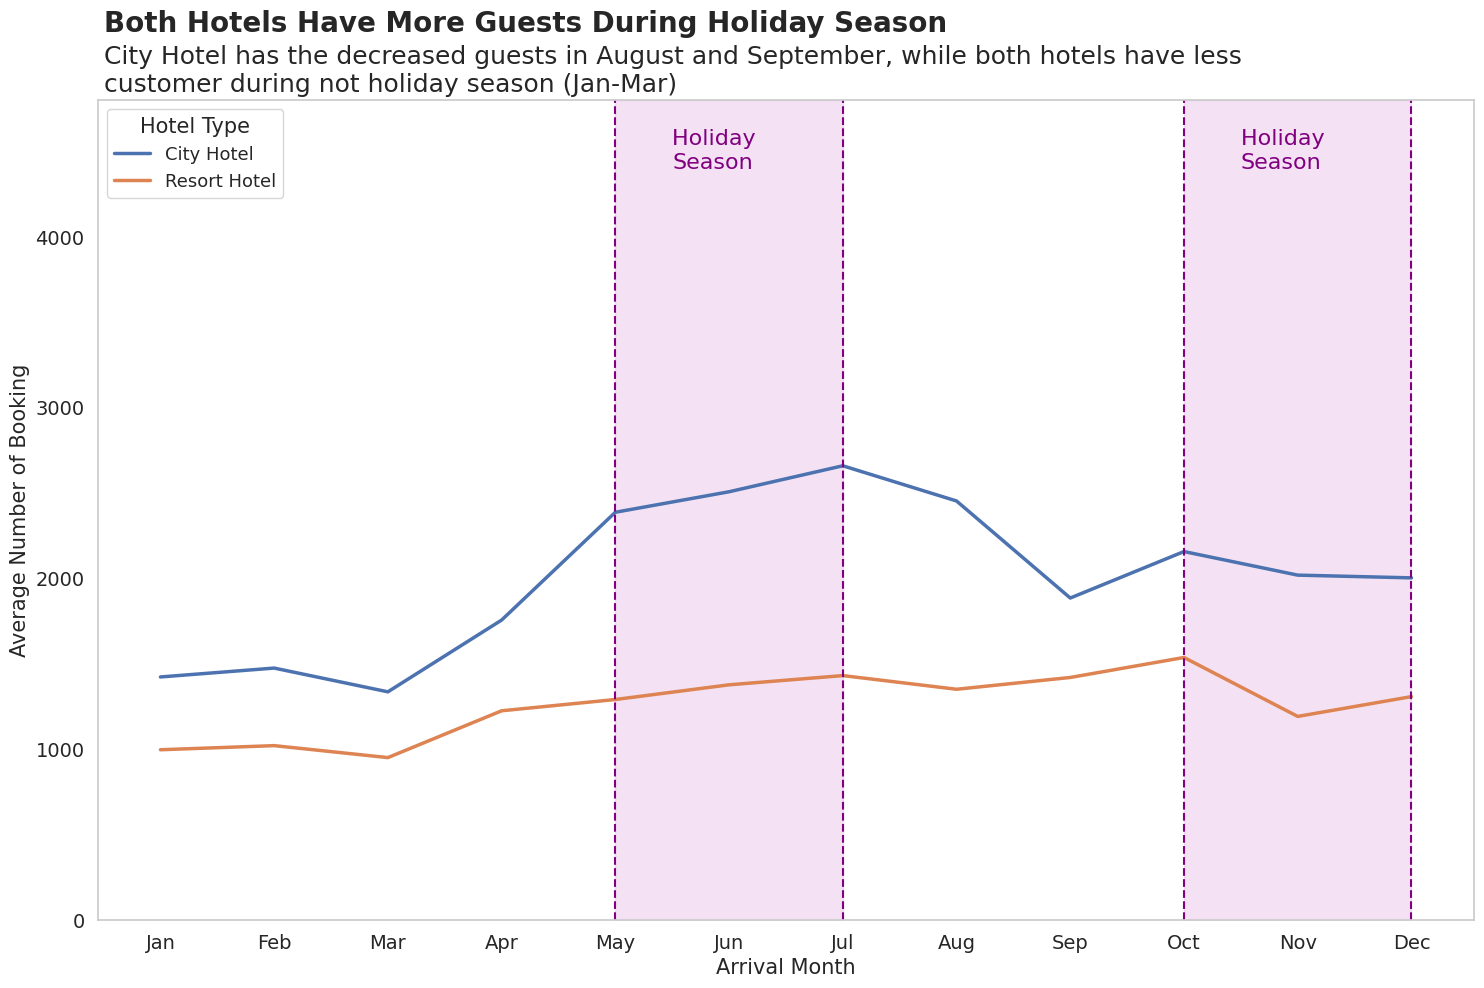

In [ ]:
plt.figure(figsize=(15,10)) # mengatur ukuran figure
sns.lineplot(x='month', y='avg_booking', hue='hotel_type',
             size="hotel_type", sizes=(2.5, 2.5), data=df_book) # plot awal menggunakan lineplot dari library seaborn

plt.tick_params(axis='both', which='major', labelsize=14) # memperbesar ukuran x-y axis label
plt.grid() # menambahkan gridline
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13}) # mengatur judul dan ukuran font pada legenda

plt.xlabel('Arrival Month', fontsize=15) # mengatur title pada x-axis
plt.ylabel('Average Number of Booking', fontsize=15) # mengatur title pada y-axis
plt.ylim(0, 4800) # membatasi y axis

plt.axvline(4, ls='--', color='purple') # membuat garis vertikal untuk menghighlight insight
plt.axvline(6, ls='--', color='purple') # membuat garis vertikal untuk menghighlight insight
plt.text(x=4.5, y=4400, s='Holiday \nSeason', fontsize=16, color='purple') # menambahkan teks keterangan
plt.stackplot(np.arange(4,7,1), [[4800]], color='plum', alpha=0.3) # memberikan blok warna pada area yang dihighlight 2 garis vertikal

plt.axvline(9, ls='--', color='purple') # membuat garis vertikal untuk menghighlight insight
plt.axvline(11, ls='--', color='purple') # membuat garis vertikal untuk menghighlight insight
plt.text(x=9.5, y=4400, s='Holiday \nSeason', fontsize=16, color='purple') # menambahkan teks keterangan
plt.stackplot(np.arange(9,12,1), [[4800]], color='plum', alpha=0.3) # memberikan blok warna pada

plt.text(x=-0.5, y=5200, s="Both Hotels Have More Guests During Holiday Season",
         fontsize=20, fontweight='bold') # memberikan judul yang informatif
plt.text(x=-0.5, y=4850, s="City Hotel has the decreased guests in August and September, while both hotels have less \ncustomer during not holiday season (Jan-Mar)",
         fontsize=18) # memberikan keterangan tambahan atas judul

plt.tight_layout() # mengatur layout dari visualisasi agar tidak terpotong

###**5. write an interpretation of the results from the previous plot**

Grafik tersebut menggambarkan dua line plot yang merepresentasikan perubahan rata-rata total pemesanan hotel setiap bulan untuk dua jenis hotel yang berbeda. Garis pada grafik menunjukkan bagaimana jumlah rata-rata pemesanan berubah dari bulan ke bulan dalam tahun yang diamati.

**1. City Hotel:**

- Terlihat dari line plot untuk City Hotel, jumlah rata-rata total pemesanan cenderung mengalami fluktuasi sepanjang tahun.
- Pada bulan April, tercatat rata-rata total pemesanan tertinggi untuk City Hotel, yang diikuti bulan Juli.
- Bulan dengan rata-rata total pemesanan terendah adalah Januari dan Maret.
- Secara keseluruhan, City Hotel menunjukkan tren naik turun dalam jumlah pemesanan sepanjang tahun.

**2. Resort Hotel:**

- Line plot untuk Resort Hotel juga menunjukkan fluktuasi dalam jumlah rata-rata total pemesanan sepanjang tahun.
- Pada bulan Oktober, Resort Hotel memiliki rata-rata total pemesanan tertinggi, dan bulan Maret memiliki rata-rata total pemesanan terendah.
- Meskipun Resort Hotel menunjukkan fluktuasi bulanan, tren umumnya menunjukkan peningkatan jumlah pemesanan dari Januari hingga Oktober dan kemudian sedikit menurun hingga akhir tahun.

**Kesimpulan:**
Grafik ini memberikan pemahaman tentang bagaimana jumlah rata-rata total pemesanan berubah sepanjang tahun untuk kedua jenis hotel. Baik City Hotel maupun Resort Hotel menunjukkan fluktuasi bulanan dalam jumlah pemesanan, dengan beberapa bulan mencatat pemesanan yang lebih tinggi daripada bulan lainnya. Perubahan tren ini dapat dipengaruhi oleh berbagai faktor seperti musim, liburan, acara khusus, dan strategi pemasaran hotel. Analisis lebih lanjut dapat membantu kedua hotel ini dalam merencanakan dan mengeksekusi strategi pemasaran yang lebih baik untuk meningkatkan jumlah pemesanan secara keseluruhan.


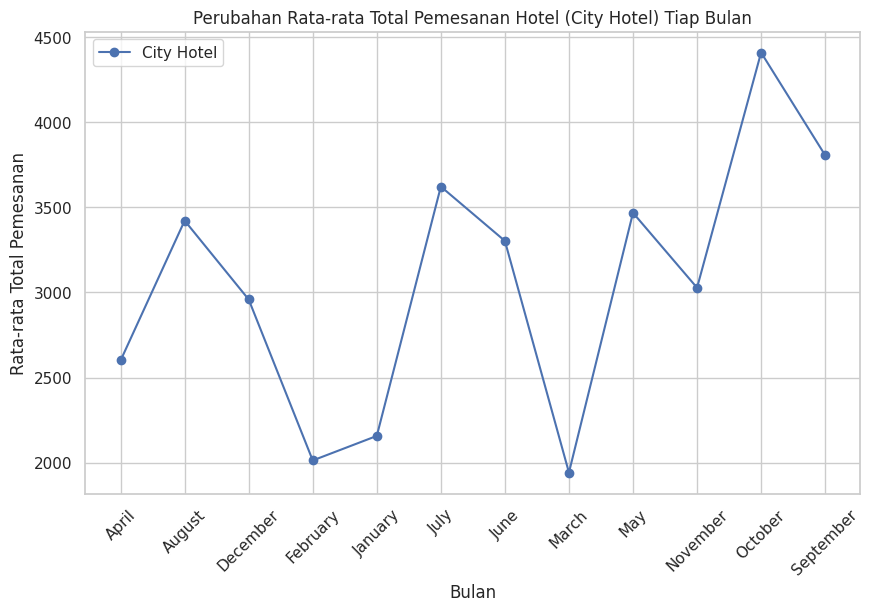

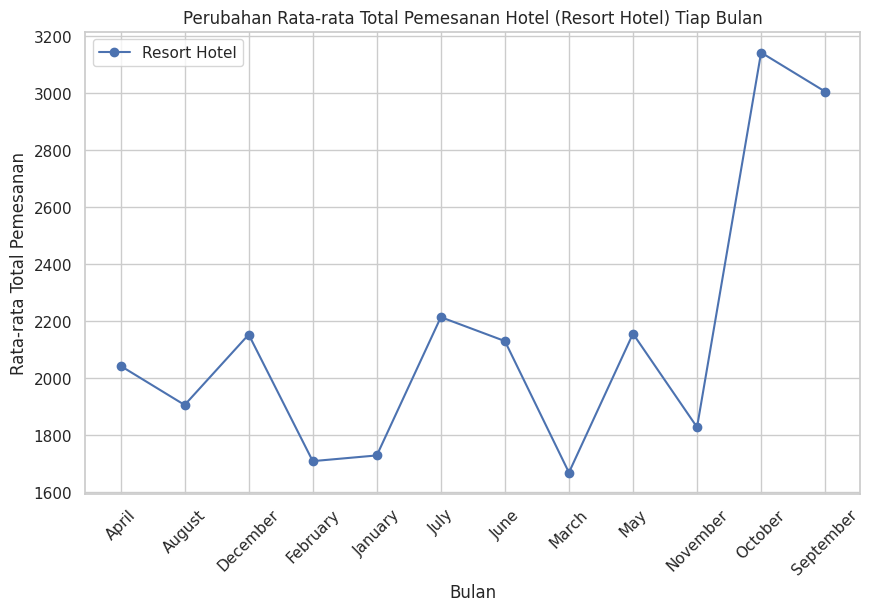

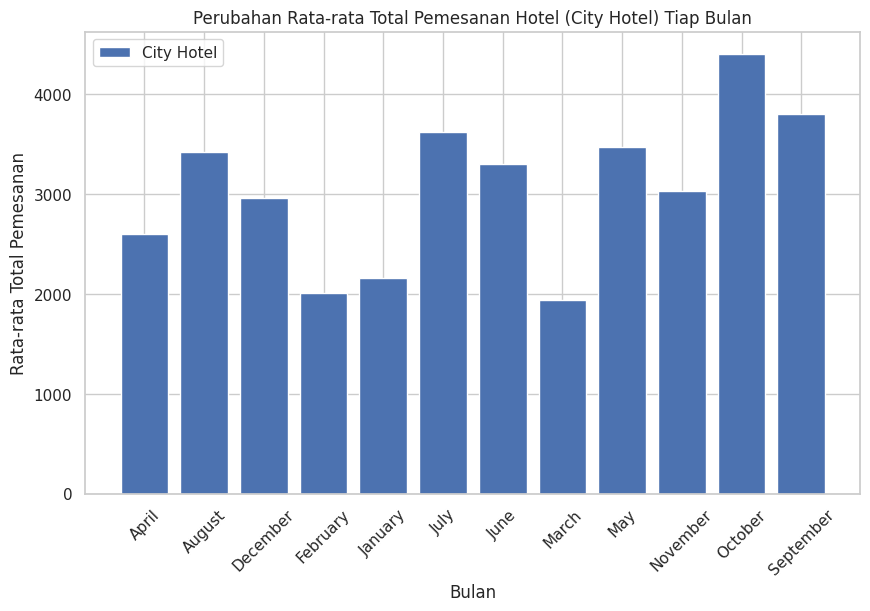

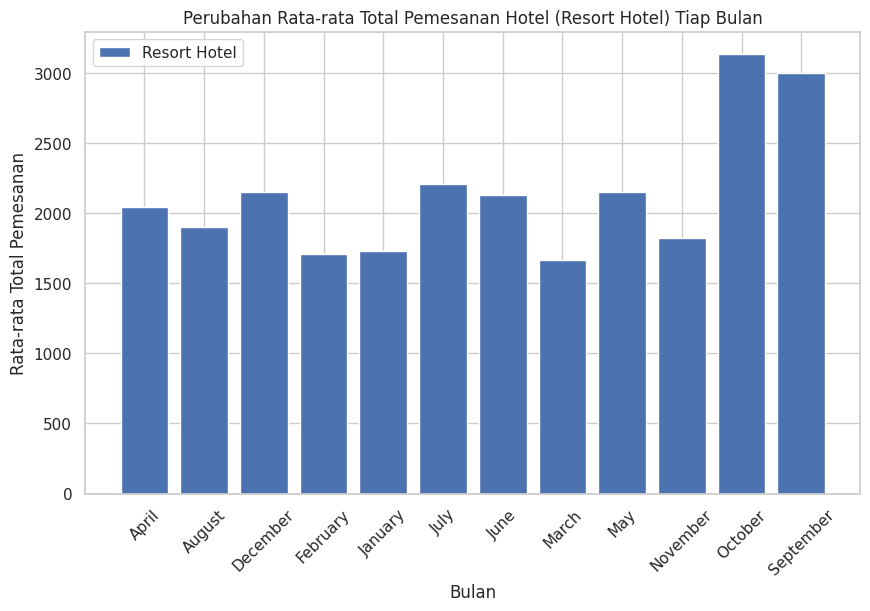

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Hitung jumlah total pemesanan (tidak dibatalkan) untuk setiap bulan dan tipe hotel
df_filtered = df[df['is_canceled'] == 0]  # Hanya data yang tidak dibatalkan yang akan dihitung
total_bookings_per_month = df_filtered.groupby(['hotel', 'arrival_date_month'])['is_canceled'].count().reset_index()

# Hitung rata-rata total pemesanan untuk setiap bulan dan tipe hotel
average_total_booking_per_month = total_bookings_per_month.groupby(['hotel', 'arrival_date_month'])['is_canceled'].mean().reset_index()

# Plot line plot untuk setiap tipe hotel
for hotel_type in average_total_booking_per_month['hotel'].unique():
    data_hotel_type = average_total_booking_per_month[average_total_booking_per_month['hotel'] == hotel_type]
    bulan = data_hotel_type['arrival_date_month']
    rata_rata_pemesanan = data_hotel_type['is_canceled']

    plt.figure(figsize=(10, 6))
    plt.plot(bulan, rata_rata_pemesanan, marker='o', label=hotel_type)
    plt.xlabel('Bulan')
    plt.ylabel('Rata-rata Total Pemesanan')
    plt.title(f'Perubahan Rata-rata Total Pemesanan Hotel ({hotel_type}) Tiap Bulan')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot bar plot untuk setiap tipe hotel
for hotel_type in average_total_booking_per_month['hotel'].unique():
    data_hotel_type = average_total_booking_per_month[average_total_booking_per_month['hotel'] == hotel_type]
    bulan = data_hotel_type['arrival_date_month']
    rata_rata_pemesanan = data_hotel_type['is_canceled']

    plt.figure(figsize=(10, 6))
    plt.bar(bulan, rata_rata_pemesanan, label=hotel_type)
    plt.xlabel('Bulan')
    plt.ylabel('Rata-rata Total Pemesanan')
    plt.title(f'Perubahan Rata-rata Total Pemesanan Hotel ({hotel_type}) Tiap Bulan')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()


###**5. write an interpretation of the results from the previous plot**

Pada plot sebelumnya yang menunjukkan perubahan rata-rata total pemesanan hotel tiap bulan berdasarkan tipe hotel (City Hotel dan Resort Hotel), kita dapat mengamati beberapa hal menarik:

1. Perbedaan Pemesanan antara City Hotel dan Resort Hotel:

- City Hotel: Pada umumnya, City Hotel memiliki jumlah pemesanan yang lebih tinggi dibandingkan dengan Resort Hotel. Ini bisa disebabkan oleh popularitas kota-kota tujuan bisnis atau destinasi wisata yang berada di sekitar kawasan kota.
- Resort Hotel: Jumlah pemesanan di Resort Hotel biasanya lebih rendah dibandingkan dengan City Hotel karena resort umumnya menarik wisatawan untuk berlibur dan bersantai di lokasi yang lebih terpencil.

2. Pola Pemesanan Tiap Bulan:

- Peningkatan Musim Liburan: Kedua tipe hotel mengalami peningkatan pemesanan selama bulan-bulan liburan, seperti Juni, Juli, dan Agustus. Ini dapat disebabkan oleh musim liburan sekolah dan musim panas, di mana banyak orang berlibur bersama keluarga atau teman-teman.
- Penurunan Pemesanan: Pada beberapa bulan, terutama di bulan-bulan yang berdekatan dengan tanggal liburan besar seperti Natal dan Tahun Baru, terjadi penurunan pemesanan hotel. Hal ini mungkin disebabkan oleh orang-orang yang lebih memilih untuk merayakan liburan di rumah atau merencanakan perjalanan keluar kota yang lebih panjang.

3. Pengaruh Hari Raya dan Libur Nasional:

- Kenaikan Pemesanan Selama Liburan Nasional: Pemesanan hotel cenderung meningkat saat Hari Raya besar seperti Idul Fitri, Natal, dan Tahun Baru. Hal ini dapat disebabkan oleh keinginan orang-orang untuk merayakan momen-momen penting ini bersama keluarga dan kerabat, atau berlibur selama waktu liburan yang panjang.
- Penurunan Pemesanan di Tengah Pekan: Pada bulan-bulan tertentu, khususnya di tengah pekan ketika tidak ada libur nasional, kita dapat mengamati penurunan pemesanan hotel. Ini bisa menjadi waktu ketika orang lebih fokus pada kegiatan kerja dan kewajiban rutin lainnya.

4. Pengaruh Peristiwa Khusus:

- Puncak Pemesanan selama Acara Khusus: Dalam beberapa kasus, ada kenaikan pemesanan hotel selama acara-acara khusus atau peristiwa penting yang diadakan di kota tertentu. Contohnya, pemesanan hotel bisa meningkat saat ada konferensi bisnis besar, festival musik, atau acara olahraga.

Dalam interpretasi di atas, kita juga harus mempertimbangkan pengaruh faktor lain seperti kondisi ekonomi, tren pariwisata, kampanye promosi hotel, dan lain-lain. Selain itu, perlu diingat bahwa peristiwa lokal seperti libur sekolah atau hari raya di Indonesia mungkin berbeda dengan negara lain, sehingga hasilnya dapat bervariasi tergantung pada konteks geografis dan budaya.

##<b> Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates 🛏

1. Create a new column containing the total duration of stay.
2. Group the values from the new column in the previous step to make them more significant
3. Create an aggregate table that shows the ratio of the number of canceled hotel reservations to the duration of stay for each type of hotel
4. Create a plot that shows the ratio of cancellations to length of stay for each type of hotel
5. Write an interpretation of the plot results in the previous step

In [ ]:
df_final.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration,arrival_date_num_month
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,0,Personal,75.0,0,0,Check-Out,1,1,9
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,0,Personal,75.0,0,0,Check-Out,1,1,9
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,0,Personal,98.0,0,1,Check-Out,2,2,9
5,Resort Hotel,0,0,2017,September,27,1,0,2,2,...,0,0,Personal,107.0,0,0,Check-Out,2,2,9
6,Resort Hotel,0,9,2017,September,27,1,0,2,2,...,0,0,Personal,103.0,0,1,Check-Out,2,2,9


###**1. Create a new column that contains the total duration of the stay**

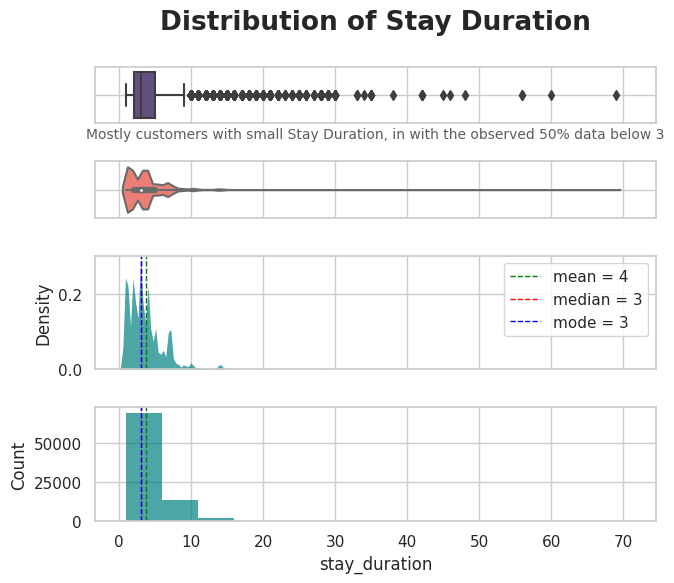

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=1,
                       figsize=(7, 6), sharex=True,
                       gridspec_kw={'height_ratios': [3, 3, 6, 6]})
total_charges = df_final['stay_duration'].dropna(axis=0)

b = sns.boxplot(x=total_charges, ax=ax[0], color='#5F4888')

v = sns.violinplot(x=total_charges, ax=ax[1], color='#FF6F61')

k = sns.kdeplot(x=total_charges, ax=ax[2], color='#008080', fill=True,
                alpha=.7, linewidth=0)

h = sns.histplot(x=total_charges, ax=ax[3], binwidth=5, color='#008080', fill=True,
                 alpha=.7, linewidth=0)

mean = round(total_charges.mean(), 3)
median = total_charges.median()
mode = total_charges.mode()[0]

measurements = [mean, median, mode]
names = ['mean', 'median', 'mode']
colors = ['green', 'red', 'blue']

for measurement, name, color in zip(measurements, names, colors):
    k.axvline(x=measurement, linestyle='--', linewidth=1, label='{} = {:,.0f}'.format(name, measurement), c=color)
    h.axvline(x=measurement, linestyle='--', linewidth=1, label='{} = {:,.0f}'.format(name, measurement), c=color)

# Adding horizontal grid lines and format tabel
for ax in [k, v, b]:
    ax.yaxis.grid(True)
    ax.set(xlabel=None)

b.set_title('Distribution of Stay Duration',
            fontsize=19, fontweight='bold', pad=27)

# Set info
x_start, x_end = b.get_xlim()
y_start, y_end = b.get_ylim()
desc = 'Mostly customers with small Stay Duration, in with the observed 50% data below 3'
b.text((x_start + x_end) / 2, y_end + 1.25, desc,
       ha='center', fontsize=10, alpha=0.75)

k.set_xlabel('Stay Duration')
k.legend()
plt.tight_layout()
plt.show()

Based on the data distribution, it appears to be positively skewed or right skewed. To facilitate data categorization, grouping will be applied. Data points greater than 21 will be combined into a single category.

###**2. Group the values of the new column from the previous step to make it more significant**

In [ ]:
#get stay duration group
def set_staydur_group(x):
    if x['stay_duration'] <= 7:
       return '1 Week'
    elif x['stay_duration'] <=14:
       return '2 Week'
    elif x['stay_duration'] <=21:
       return '3 Week'
    return '4 Week'

df_final['stay_duration_group'] = df_final.apply(lambda x: set_staydur_group(x), axis = 1)
df_final['stay_duration_group'].unique()

array(['1 Week', '2 Week', '3 Week', '4 Week'], dtype=object)

In [ ]:
df_final['stay_duration_group'].value_counts()

1 Week    80560
2 Week     4459
3 Week      234
4 Week      125
Name: stay_duration_group, dtype: int64

###**3. Create an aggregate table that shows the ratio of the number of canceled hotel reservations to the duration of stay for each type of hotel**

In [ ]:
df_cancel = df_final.groupby(['hotel', 'stay_duration_group', 'is_canceled']) \
                    .agg({'hotel':'count'}) \
                    .rename(columns={'hotel': 'num_booking'}) \
                    .reset_index()

df_tot_cancel = df_cancel.groupby(['hotel', 'stay_duration_group']) \
                    .agg({'num_booking':'sum'}) \
                    .rename(columns={'num_booking': 'total_booking'}) \
                    .reset_index()

df_cancel = df_cancel.merge(df_tot_cancel, on=['hotel', 'stay_duration_group'])

df_cancel['cancellation_ratio'] = round((df_cancel['num_booking']/df_cancel['total_booking'])*100, 2)

df_cancel

,hotel,stay_duration_group,is_canceled,num_booking,total_booking,cancellation_ratio
0,City Hotel,1 Week,0,35845,51037,70.23
1,City Hotel,1 Week,1,15192,51037,29.77
2,City Hotel,2 Week,0,486,1009,48.17
3,City Hotel,2 Week,1,523,1009,51.83
4,City Hotel,3 Week,0,27,100,27.00
5,City Hotel,3 Week,1,73,100,73.00
6,City Hotel,4 Week,0,6,45,13.33
7,City Hotel,4 Week,1,39,45,86.67
8,Resort Hotel,1 Week,0,22665,29523,76.77
9,Resort Hotel,1 Week,1,6858,29523,23.23


we will be conducting an observation on data with canceled bookings, specifically focusing on the cancellation ratio for each hotel type. To do this, we will filter the data to include only records where 'is_canceled' equals 1.

In [ ]:
#pick the data that hotels has been canceled
df_cancel_final = df_cancel[df_cancel['is_canceled']==1]
df_cancel_final

,hotel,stay_duration_group,is_canceled,num_booking,total_booking,cancellation_ratio
1,City Hotel,1 Week,1,15192,51037,29.77
3,City Hotel,2 Week,1,523,1009,51.83
5,City Hotel,3 Week,1,73,100,73.00
7,City Hotel,4 Week,1,39,45,86.67
9,Resort Hotel,1 Week,1,6858,29523,23.23
11,Resort Hotel,2 Week,1,939,3450,27.22
13,Resort Hotel,3 Week,1,47,134,35.07
15,Resort Hotel,4 Week,1,26,80,32.50


###**4. Create a plot that shows the ratio of cancellations to duration of stay for each type of hotel**
---
*   x = Stay Duration Group
*   y = Cancellation Ratio %

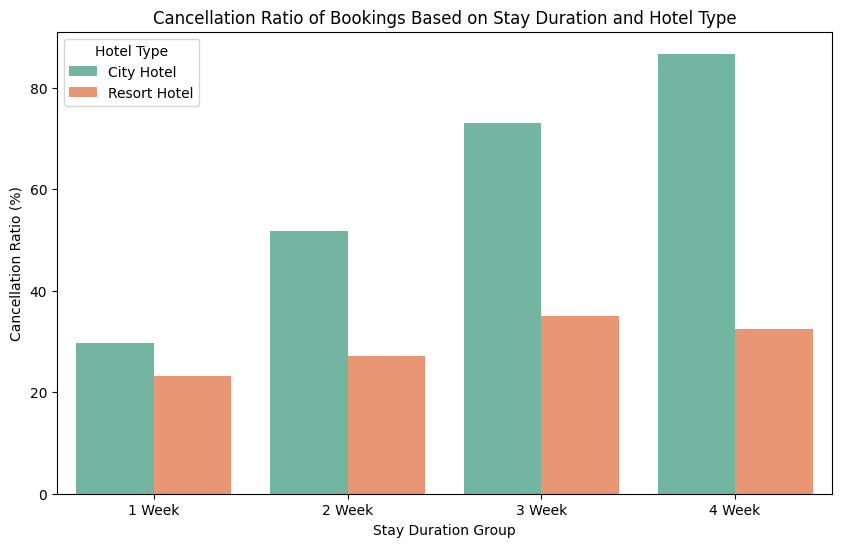

In [ ]:
# Group the data by hotel and stay_duration_group and calculate the cancellation ratio
df_cancel = df_final.groupby(['hotel', 'stay_duration_group', 'is_canceled']) \
                    .agg({'hotel':'count'}) \
                    .rename(columns={'hotel': 'num_booking'}) \
                    .reset_index()

df_tot_cancel = df_cancel.groupby(['hotel', 'stay_duration_group']) \
                    .agg({'num_booking':'sum'}) \
                    .rename(columns={'num_booking': 'total_booking'}) \
                    .reset_index()

df_cancel = df_cancel.merge(df_tot_cancel, on=['hotel', 'stay_duration_group'])

df_cancel['cancellation_ratio'] = round((df_cancel['num_booking'] / df_cancel['total_booking']) * 100, 2)

# Pick the data for canceled bookings only
df_cancel_final = df_cancel[df_cancel['is_canceled'] == 1]

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='stay_duration_group', y='cancellation_ratio', hue='hotel', data=df_cancel_final, palette='Set2')

plt.xlabel('Stay Duration Group')
plt.ylabel('Cancellation Ratio (%)')
plt.title('Cancellation Ratio of Bookings Based on Stay Duration and Hotel Type')
plt.legend(title='Hotel Type')
plt.show()


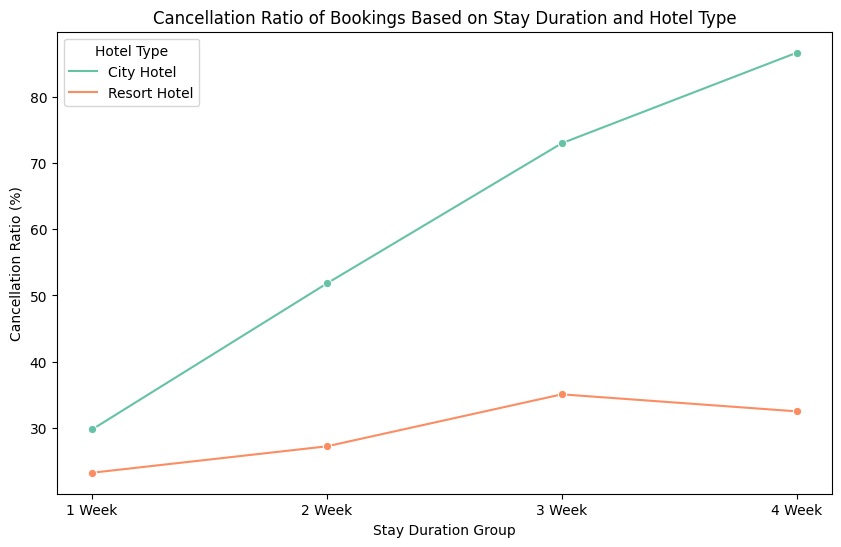

In [ ]:
# Group the data by hotel and stay_duration_group and calculate the cancellation ratio
df_cancel = df_final.groupby(['hotel', 'stay_duration_group', 'is_canceled']) \
                    .agg({'hotel':'count'}) \
                    .rename(columns={'hotel': 'num_booking'}) \
                    .reset_index()

df_tot_cancel = df_cancel.groupby(['hotel', 'stay_duration_group']) \
                    .agg({'num_booking':'sum'}) \
                    .rename(columns={'num_booking': 'total_booking'}) \
                    .reset_index()

df_cancel = df_cancel.merge(df_tot_cancel, on=['hotel', 'stay_duration_group'])

df_cancel['cancellation_ratio'] = round((df_cancel['num_booking'] / df_cancel['total_booking']) * 100, 2)

# Pick the data for canceled bookings only
df_cancel_final = df_cancel[df_cancel['is_canceled'] == 1]

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='stay_duration_group', y='cancellation_ratio', hue='hotel', data=df_cancel_final, palette='Set2', marker='o')

plt.xlabel('Stay Duration Group')
plt.ylabel('Cancellation Ratio (%)')
plt.title('Cancellation Ratio of Bookings Based on Stay Duration and Hotel Type')
plt.legend(title='Hotel Type')
plt.show()

In [ ]:
df_canceled = df_final.groupby(['hotel','stay_duration_group','is_canceled']).agg({'hotel':'count'}).rename(columns={'hotel':'num_booking'}).reset_index()
df_total_cancel = df_canceled.groupby(['hotel','stay_duration_group']).agg({'num_booking':'sum'}).rename(columns={'num_booking':'total_booking'}).reset_index()

df_canceled = df_canceled.merge(df_total_cancel, on = ['hotel','stay_duration_group'])

df_canceled['ratio_cancel'] = round((df_canceled['num_booking']/df_canceled['total_booking'])*100, 2)

df_canceled

,hotel,stay_duration_group,is_canceled,num_booking,total_booking,ratio_cancel
0,City Hotel,0.0,0,36364,52191,69.67
1,City Hotel,0.0,1,15827,52191,30.33
2,Resort Hotel,0.0,0,25317,33187,76.29
3,Resort Hotel,0.0,1,7870,33187,23.71


In [ ]:
df_cancel_final = df_canceled[df_canceled['is_canceled']==1]
df_cancel_final

,hotel,stay_duration_group,is_canceled,num_booking,total_booking,ratio_cancel
1,City Hotel,0.0,1,15827,52191,30.33
3,Resort Hotel,0.0,1,7870,33187,23.71


###**5. Write an interpretation of the plot results in the previous step**

Diagram tersebut menunjukkan perbandingan rasio pembatalan pesanan untuk setiap durasi menginap (1 minggu, 2 minggu, 3 minggu, dan 4 minggu) antara dua tipe hotel, yaitu City Hotel dan Resort Hotel.

**1. City Hotel:**

- Rasio pembatalan pesanan di City Hotel cenderung tinggi untuk durasi menginap 2 minggu, 3 minggu, dan 4 minggu.
- Durasi menginap 4 minggu memiliki rasio pembatalan yang paling tinggi.
- Rasio pembatalan terendah terjadi untuk durasi menginap 1 minggu.

**2. Resort Hotel:**

- Rasio pembatalan pesanan di Resort Hotel cenderung lebih rendah dibandingkan dengan City Hotel untuk semua durasi menginap.
- Durasi menginap 4 minggu memiliki rasio pembatalan tertinggi di Resort Hotel.
- Durasi menginap 1 minggu memiliki rasio pembatalan terendah di Resort - Hotel.

**Kesimpulan:**

- Terdapat perbedaan dalam rasio pembatalan pesanan antara City Hotel dan Resort Hotel untuk semua durasi menginap yang diamati.
- City Hotel memiliki rasio pembatalan yang lebih tinggi daripada Resort Hotel untuk durasi menginap yang lebih lama (2 minggu, 3 minggu, dan 4 minggu).
- Resort Hotel cenderung memiliki rasio pembatalan yang lebih rendah untuk semua durasi menginap, dengan rasio pembatalan terendah terjadi untuk durasi menginap 1 minggu.
- Durasi menginap 1 minggu memiliki rasio pembatalan terendah di kedua jenis hotel.
- Informasi ini dapat membantu manajemen hotel untuk memahami pola pembatalan pesanan dan mengidentifikasi durasi menginap yang berisiko tinggi untuk pembatalan. Dengan demikian, mereka dapat mengambil langkah-langkah untuk mengurangi pembatalan, meningkatkan kepuasan pelanggan, dan meningkatkan efisiensi operasional.

##<b> Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate 🕔

1. Create a new column that categorizes the booking lead time.
2. Create an aggregated table that shows the comparison of canceled hotel bookings based on the booking lead time for each hotel type.
3. Create a plot that illustrates the cancellation ratio of bookings based on the booking lead time for each hotel type.
4. Write an interpretation of the plot results in the previous step.

###**1. Create a new column that categorizes the booking lead time**

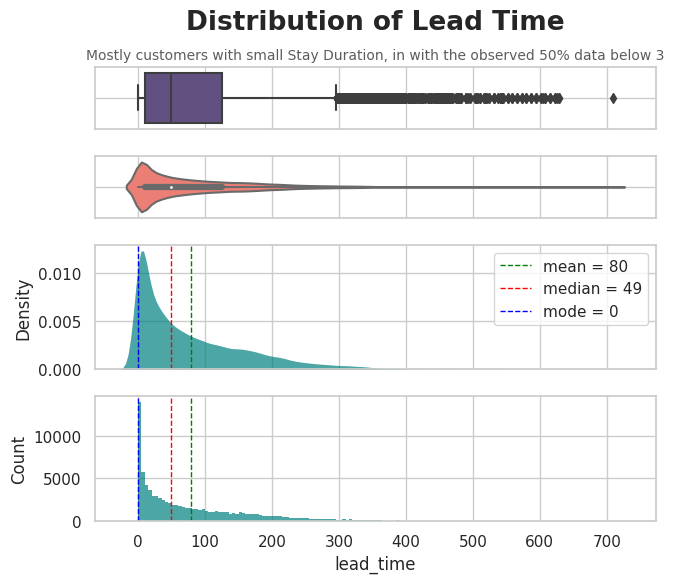

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=1,
                       figsize=(7, 6), sharex=True,
                       gridspec_kw={'height_ratios': [3, 3, 6, 6]})
total_charges = df_final['lead_time'].dropna(axis=0)

b = sns.boxplot(x=total_charges, ax=ax[0], color='#5F4888')

v = sns.violinplot(x=total_charges, ax=ax[1], color='#FF6F61')

k = sns.kdeplot(x=total_charges, ax=ax[2], color='#008080', fill=True,
                alpha=.7, linewidth=0)

h = sns.histplot(x=total_charges, ax=ax[3], binwidth=5, color='#008080', fill=True,
                 alpha=.7, linewidth=0)

mean = round(total_charges.mean(), 3)
median = total_charges.median()
mode = total_charges.mode()[0]

measurements = [mean, median, mode]
names = ['mean', 'median', 'mode']
colors = ['green', 'red', 'blue']

for measurement, name, color in zip(measurements, names, colors):
    k.axvline(x=measurement, linestyle='--', linewidth=1, label='{} = {:,.0f}'.format(name, measurement), c=color)
    h.axvline(x=measurement, linestyle='--', linewidth=1, label='{} = {:,.0f}'.format(name, measurement), c=color)

# Adding horizontal grid lines and format tabel
for ax in [k, v, b]:
    ax.yaxis.grid(True)
    ax.set(xlabel=None)

b.set_title('Distribution of Lead Time',
            fontsize=19, fontweight='bold', pad=27)

# Set info
x_start, x_end = b.get_xlim()
y_start, y_end = b.get_ylim()
desc = 'Mostly customers with small Stay Duration, in with the observed 50% data below 3'
b.text((x_start + x_end) / 2, y_end * 1.25, desc,
       ha='center', fontsize=10, alpha=0.75)

k.set_xlabel('Lead Time')
k.legend()
plt.tight_layout()
plt.show()

###**2. Create an aggregated table that shows the comparison of canceled hotel bookings based on the booking lead time for each hotel type.**

In [ ]:
#get lead time group
def set_leadtime_group(x):
    if x['lead_time'] <= 30:
        return '1 Month'
    elif x['lead_time'] <= 120:
        return '2 - 4 Months'
    elif x['lead_time'] <= 210:
        return '5 - 7 Months'
    elif x['lead_time'] <= 300:
        return '8 - 10 Months'
    elif x['lead_time'] <= 360:
        return '11 - 12 Months'
    return '> 12 Months'

df_final['lead_time_group'] = df_final.apply(lambda x: set_leadtime_group(x), axis = 1)
df_final['lead_time_group'].unique()

array(['1 Month', '2 - 4 Months', '5 - 7 Months', '> 12 Months',
       '11 - 12 Months', '8 - 10 Months'], dtype=object)

In [ ]:
df_final['lead_time_group'].value_counts()

1 Month           33810
2 - 4 Months      29379
5 - 7 Months      14484
8 - 10 Months      5532
11 - 12 Months     1558
> 12 Months         615
Name: lead_time_group, dtype: int64

###**3. Create a plot that illustrates the cancellation ratio of bookings based on the booking lead time for each hotel type**

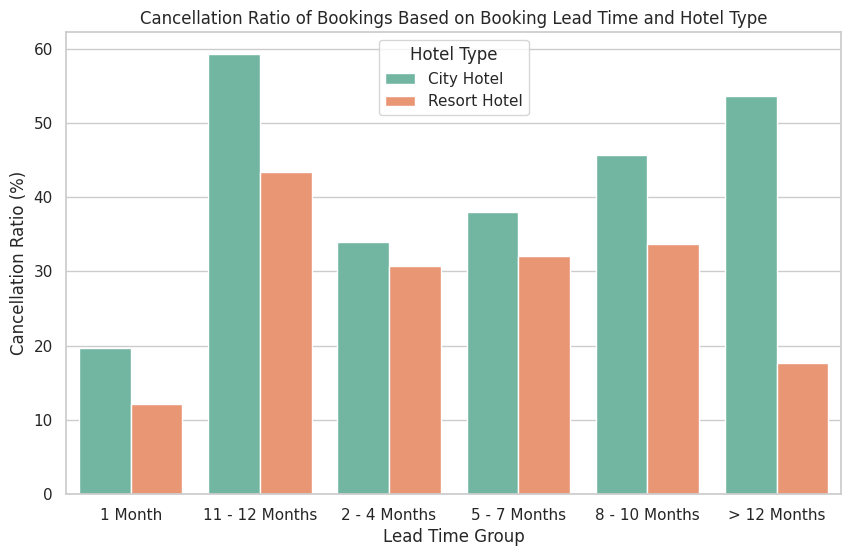

In [ ]:
df_cancel2 = df_final.groupby(['hotel', 'lead_time_group', 'is_canceled']) \
                     .agg({'hotel':'count'}) \
                     .rename(columns={'hotel': 'num_booking'}) \
                     .reset_index()

df_tot_cancel2 = df_cancel2.groupby(['hotel', 'lead_time_group']) \
                     .agg({'num_booking':'sum'}) \
                     .rename(columns={'num_booking': 'total_booking'}) \
                     .reset_index()

df_cancel2 = df_cancel2.merge(df_tot_cancel2, on=['hotel', 'lead_time_group'])

df_cancel2['cancellation_ratio'] = round((df_cancel2['num_booking'] / df_cancel2['total_booking']) * 100, 2)

# Pick the data for canceled bookings only
df_cancel_final2 = df_cancel2[df_cancel2['is_canceled'] == 1]

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='lead_time_group', y='cancellation_ratio', hue='hotel', data=df_cancel_final2, palette='Set2')

plt.xlabel('Lead Time Group')
plt.ylabel('Cancellation Ratio (%)')
plt.title('Cancellation Ratio of Bookings Based on Booking Lead Time and Hotel Type')
plt.legend(title='Hotel Type')
plt.show()

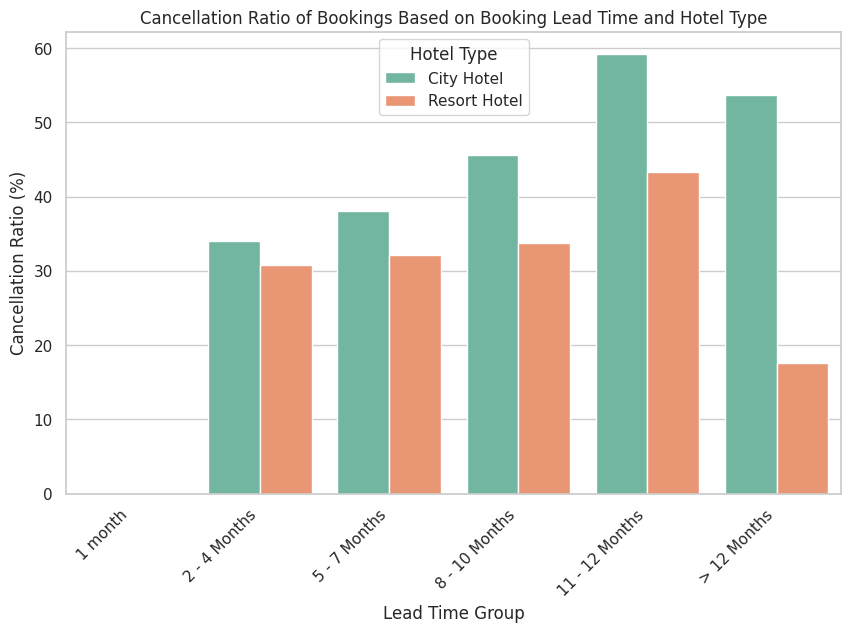

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_final is your DataFrame containing the necessary data

# Define the desired order of 'lead_time_group' values
lead_time_order = ['1 month', '2 - 4 Months', '5 - 7 Months', '8 - 10 Months', '11 - 12 Months', '> 12 Months']

df_cancel2 = df_final.groupby(['hotel', 'lead_time_group', 'is_canceled']) \
                     .agg({'hotel': 'count'}) \
                     .rename(columns={'hotel': 'num_booking'}) \
                     .reset_index()

df_tot_cancel2 = df_cancel2.groupby(['hotel', 'lead_time_group']) \
                     .agg({'num_booking': 'sum'}) \
                     .rename(columns={'num_booking': 'total_booking'}) \
                     .reset_index()

df_cancel2 = df_cancel2.merge(df_tot_cancel2, on=['hotel', 'lead_time_group'])

df_cancel2['cancellation_ratio'] = round((df_cancel2['num_booking'] / df_cancel2['total_booking']) * 100, 2)

# Pick the data for canceled bookings only
df_cancel_final2 = df_cancel2[df_cancel2['is_canceled'] == 1]

# Set the order of 'lead_time_group' values
df_cancel_final2['lead_time_group'] = pd.Categorical(df_cancel_final2['lead_time_group'], categories=lead_time_order, ordered=True)

# Sort the DataFrame based on the custom order of 'lead_time_group'
df_cancel_final2 = df_cancel_final2.sort_values(by='lead_time_group')

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='lead_time_group', y='cancellation_ratio', hue='hotel', data=df_cancel_final2, palette='Set2')

plt.xlabel('Lead Time Group')
plt.ylabel('Cancellation Ratio (%)')
plt.title('Cancellation Ratio of Bookings Based on Booking Lead Time and Hotel Type')
plt.legend(title='Hotel Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


###**4. Write an interpretation of the plot results in the previous step**

Diagram tersebut menunjukkan perbandingan rasio pembatalan pesanan terhadap lead time (waktu pemesanan sebelum kedatangan) untuk kedua tipe hotel, yaitu City Hotel dan Resort Hotel.

**1. City Hotel:**

- Rasio pembatalan pesanan di City Hotel cenderung tinggi untuk lead time yang sangat lama, yaitu untuk pemesanan yang dilakukan 11-12 bulan sebelum kedatangan dan lebih dari 12 bulan sebelum kedatangan.
- Pemesanan dengan lead time 11-12 bulan memiliki rasio pembatalan tertinggi.
- Rasio pembatalan cenderung menurun untuk lead time yang lebih pendek, namun tetap relatif tinggi untuk lead time 5-7 bulan, dan 8-10 bulan.
- Pemesanan dengan lead time 1 bulan memiliki rasio pembatalan terendah.

**2. Resort Hotel:**

- Rasio pembatalan pesanan di Resort Hotel cenderung lebih rendah dibandingkan dengan City Hotel untuk semua grup lead time.
- Resort Hotel memiliki rasio pembatalan yang paling rendah untuk lead time 1 bulan.
- Resort Hotel juga menunjukkan rasio pembatalan yang relatif rendah untuk lead time 2-4 bulan, 5-7 bulan, dan 8-10 bulan.
- Pemesanan dengan lead time 11-12 bulan memiliki rasio pembatalan tertinggi di Resort Hotel.

**Kesimpulan:**

- Diagram tersebut menggambarkan bahwa City Hotel memiliki rasio pembatalan yang lebih tinggi dibandingkan dengan Resort Hotel untuk semua grup lead time.
- Resort Hotel cenderung memiliki rasio pembatalan yang lebih rendah, terutama untuk pemesanan dengan lead time yang lebih pendek.
- Pemesanan dengan lead time yang sangat lama, yaitu 11-12 bulan dan lebih dari 12 bulan, memiliki risiko pembatalan yang tinggi, terutama di City Hotel.
- Informasi ini dapat membantu manajemen hotel dalam merencanakan strategi pemasaran dan kebijakan pembatalan yang lebih efektif. Dengan memahami pola pembatalan berdasarkan lead time, hotel dapat mengambil langkah-langkah untuk mengurangi tingkat pembatalan dan meningkatkan tingkat konversi pemesanan, sehingga meningkatkan efisiensi operasional dan kepuasan pelanggan.